<a href="https://colab.research.google.com/github/Rorando111/cpe019/blob/main/Celeste_Assignment_8_1_Saving_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Assignment 8.1 : Saving Models** |
**Name** | Celeste, Rolando
**Section** | CPE32S9
**Date Performed**: | 04/18/2024
**Date Submitted**: | 04/19/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

Instructions:

1. Choose any dataset applicable to either a classification problem or a regression problem.
2. Explain your datasets and the problem being addressed.
3. Show evidence that you can do the following:
    1. Save a model in HDF5 format
    2. Save a model and load the model in a JSON format
    3. Save a model and load the model in a YAML format
    4. Checkpoint Neural Network Model Improvements
    5. Checkpoint Best Neural Network Model only
    6. Load a saved Neural Network model
    7. Visualize Model Training History in Keras
    8. Show the application of Dropout Regularization
    9. Show the application of Dropout on the visible layer
    10. Show the application of Dropout on the hidden layer
    11. Show the application of a time-based learning rate schedule
    12. Show the application of a drop-based learning rate schedule
Submit the link to your Google Colab (make sure that it is accessible to me)

## **Dataset to be used**
### **AIDS Clinical Trials Group Study 175 (From uci machine learning repository)**

The AIDS Clinical Trials Group Study 175 Dataset contains healthcare statistics and categorical information about patients who have been diagnosed with AIDS. This dataset was initially published in 1996. The prediction task is to predict whether or not each patient died within a certain window of time or not. The purpose of this dataset is to create a model that can predict the survival of AIDS patients using clinical and demographic data.

This dataset is Applicable to both regression and classification.




In [ ]:
pip install h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Dataset AIDS Clinical Trials Group Study 175


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890)

# data (as pandas dataframes)
X = aids_clinical_trials_group_study_175.data.features
y = aids_clinical_trials_group_study_175.data.targets

# metadata
print(aids_clinical_trials_group_study_175.metadata)

# variable information
print(aids_clinical_trials_group_study_175.variables)


{'uci_id': 890, 'name': 'AIDS Clinical Trials Group Study 175', 'repository_url': 'https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175', 'data_url': 'https://archive.ics.uci.edu/static/public/890/data.csv', 'abstract': 'The AIDS Clinical Trials Group Study 175 Dataset contains healthcare statistics and categorical information about patients who have been diagnosed with AIDS. This dataset was initially published in 1996. The prediction task is to predict whether or not each patient died within a certain window of time or not. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 2139, 'num_features': 23, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Sexual Orientation', 'Race', 'Gender'], 'target_col': ['cid'], 'index_col': ['pidnum'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1996, 'last_updated': 'Fri Nov 

### Pre-Processing data

In [ ]:
import pandas as pd
aids = pd.concat([X,y], axis =1)

In [ ]:
aids.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,cid
0,948,2,48,89.8128,0,0,0,100,0,0,...,0,1,0,1,0,422,477,566,324,0
1,1002,3,61,49.4424,0,0,0,90,0,1,...,1,3,0,1,0,162,218,392,564,1
2,961,3,45,88.4520,0,1,1,90,0,1,...,1,3,0,1,1,326,274,2063,1893,0
3,1166,3,47,85.2768,0,1,0,100,0,1,...,1,3,0,1,0,287,394,1590,966,0
4,1090,0,43,66.6792,0,1,0,100,0,1,...,1,3,0,0,0,504,353,870,782,0


In [ ]:
aids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2139 non-null   int64  
 1   trt      2139 non-null   int64  
 2   age      2139 non-null   int64  
 3   wtkg     2139 non-null   float64
 4   hemo     2139 non-null   int64  
 5   homo     2139 non-null   int64  
 6   drugs    2139 non-null   int64  
 7   karnof   2139 non-null   int64  
 8   oprior   2139 non-null   int64  
 9   z30      2139 non-null   int64  
 10  zprior   2139 non-null   int64  
 11  preanti  2139 non-null   int64  
 12  race     2139 non-null   int64  
 13  gender   2139 non-null   int64  
 14  str2     2139 non-null   int64  
 15  strat    2139 non-null   int64  
 16  symptom  2139 non-null   int64  
 17  treat    2139 non-null   int64  
 18  offtrt   2139 non-null   int64  
 19  cd40     2139 non-null   int64  
 20  cd420    2139 non-null   int64  
 21  cd80     2139 

### **Saving model in HDF5 format and Saving model and loading the model in a JSON format**

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os

# split into input (X) and output (Y) variables
aids_X = aids.iloc[:,:-1].values
aids_Y = aids.iloc[:,-1].values

# create model
model = Sequential()
model.add(Dense(12, input_dim=23, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(aids_X, aids_Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(aids_X, aids_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Assignment 8.1  Datasets/model.weights.h5")
print("Saved model to disk")

# later...

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Assignment 8.1  Datasets/model.weights.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(aids_X, aids_Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 87.47%
Saved model to disk
Loaded model from disk
accuracy: 87.47%


### **Analysis:**

- The model is trained for 150 epochs with a batch size of 10, achieving an accuracy of 87.47% on the training data. The model is then stored to disk by serializing it to JSON and storing the weights as an HDF5 file. The loaded model is tested on the same training data and achieves the same accuracy, showing that it may be saved and loaded for future use.

### **Saving model and loading the model in a YAML format**

In [ ]:
# MLP for Pima Indians Dataset serialize to YAML and HDF5
from tensorflow.keras.models import Sequential, model_from_yaml
from tensorflow.keras.layers import Dense
import numpy
import os
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# split into input (X) and output (Y) variables
aids_X = aids.iloc[:,:-1].values
aids_Y = aids.iloc[:,-1].values
# create model
model = Sequential()
model.add(Dense(12, input_dim=23, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(aids_X, aids_Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(aids_X, aids_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Assignment 8.1  Datasets/model_yaml.h5")
print("Saved model to disk")

# later...

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Assignment 8.1  Datasets/model_yaml.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(aids_X, aids_Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 87.28%
Saved model to disk
Loaded model from disk
accuracy: 87.28%


### **Analysis:**

- Similar to the earlier model but this model is saved to Yaml file. Also similar to the earlier model, this model may be saved and loaded for future use.

### **Checkpoint Neural Network Model Improvements**

In [ ]:
# Checkpoint the weights when validation accuracy improves
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
seed = 42
tf.random.set_seed(seed)
# load pima indians dataset

# split into input (X) and output (Y) variables
aids_X = aids.iloc[:,:-1].values
aids_Y = aids.iloc[:,-1].values
# create model
model = Sequential()
model.add(Dense(12, input_shape=(23,), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.03), metrics=['accuracy'])

# checkpoint
filepath="/content/drive/MyDrive/Assignment 8.1  Datasets/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Fit the model
model.fit(aids_X, aids_Y, validation_split=0.33, epochs=150, batch_size=15, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.76346, saving model to /content/drive/MyDrive/Assignment 8.1  Datasets/weights-improvement-01-0.76.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_accuracy did not improve from 0.76346

Epoch 3: val_accuracy did not improve from 0.76346

Epoch 4: val_accuracy did not improve from 0.76346

Epoch 5: val_accuracy did not improve from 0.76346

Epoch 6: val_accuracy did not improve from 0.76346

Epoch 7: val_accuracy did not improve from 0.76346

Epoch 8: val_accuracy did not improve from 0.76346

Epoch 9: val_accuracy did not improve from 0.76346

Epoch 10: val_accuracy did not improve from 0.76346

Epoch 11: val_accuracy did not improve from 0.76346

Epoch 12: val_accuracy did not improve from 0.76346

Epoch 13: val_accuracy did not improve from 0.76346

Epoch 14: val_accuracy did not improve from 0.76346

Epoch 15: val_accuracy did not improve from 0.76346

Epoch 16: val_accuracy did not improve from 0.76346

Epoch 17: val_accuracy did not improve from 0.76346

Epoch 18: val_accuracy did not improve from 0.76346

Epoch 19: val_accuracy did not improve from 0.76346

Epoch 20: val_accuracy did not improve from 0.76346



### **Analysis:**

- The logs show that the model's validation accuracy has not improved since epoch 0.

### **Checkpoint Best Neural Network Model only**

In [ ]:
# Checkpoint the weights for best model on validation accuracy
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
# load pima indians dataset

# split into input (X) and output (Y) variables
aids_X = aids.iloc[:,:-1].values
aids_Y = aids.iloc[:,-1].values
# create model
model = Sequential()
model.add(Dense(12, input_shape=(23,), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# checkpoint
filepath="/content/drive/MyDrive/Assignment 8.1  Datasets/weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# Fit the model
model.fit(aids_X, aids_Y, validation_split=0.33, epochs=150, batch_size=15, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.75779, saving model to /content/drive/MyDrive/Assignment 8.1  Datasets/weights.best.hdf5

Epoch 2: val_accuracy did not improve from 0.75779

Epoch 3: val_accuracy did not improve from 0.75779

Epoch 4: val_accuracy did not improve from 0.75779

Epoch 5: val_accuracy did not improve from 0.75779

Epoch 6: val_accuracy improved from 0.75779 to 0.78612, saving model to /content/drive/MyDrive/Assignment 8.1  Datasets/weights.best.hdf5

Epoch 7: val_accuracy did not improve from 0.78612

Epoch 8: val_accuracy did not improve from 0.78612

Epoch 9: val_accuracy did not improve from 0.78612

Epoch 10: val_accuracy improved from 0.78612 to 0.80170, saving model to /content/drive/MyDrive/Assignment 8.1  Datasets/weights.best.hdf5

Epoch 11: val_accuracy did not improve from 0.80170

Epoch 12: val_accuracy did not improve from 0.80170

Epoch 13: val_accuracy did not improve from 0.80170

Epoch 14: val_accuracy did not improve from 0.80170

Epoch 15

### **Analysis:**

- The model have detected a few epochs that it recognizes as the best from the model.

### **Loading a saved Neural Network model**

In [ ]:
# How to load and use weights from a checkpoint
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = Sequential()
model.add(Dense(12, input_dim=23, kernel_initializer = 'uniform' , activation= 'relu' ))
model.add(Dense(12, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))
# load weights
model.load_weights("/content/drive/MyDrive/Assignment 8.1  Datasets/weights.best.hdf5")
# Compile model (required to make predictions)
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print("Created model and loaded weights from file")

# split into input (X) and output (Y) variables
aids_X = aids.iloc[:,:-1].values
aids_Y = aids.iloc[:,-1].values
# estimate accuracy on whole dataset using loaded weights
scores = model.evaluate(aids_X, aids_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Created model and loaded weights from file
accuracy: 88.03%


### **Visualizing Model Training History in Keras**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


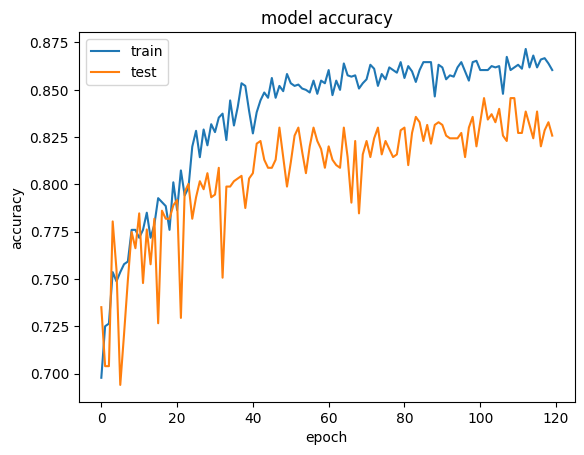

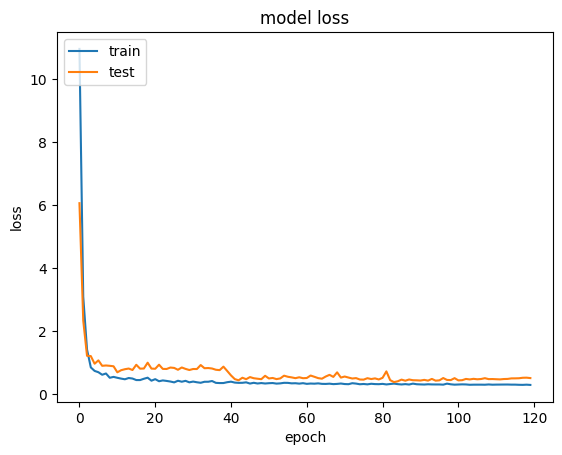

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np


# split into input (X) and output (Y) variables
aids_X = aids.iloc[:,:-1].values
aids_Y = aids.iloc[:,-1].values
# create model
model = Sequential()
model.add(Dense(12, input_dim=23, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(aids_X, aids_Y, validation_split=0.33, epochs=120, batch_size=10, verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Analysis:**

- Based on the output graphs, it is clear that the model is training the datasete steadily while reducing training and validation loss.

In [ ]:
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.2.1 which is incompatible.


### **Application of Dropout Regularization**

In [ ]:
# Baseline Model on the Sonar Dataset
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
df = aids.values
# split into input (X) and output (Y) variables
X = df[:,:-1].astype(float)
Y = df[:,-1].astype(int)

# baseline
# baseline
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(23,), activation='relu'))
	model.add(Dense(12,  activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.03, momentum=0.8)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_baseline, epochs=120, batch_size=20, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Baseline: 86.82% (1.11%)


### **Application of Dropout on the visible layer**

In [ ]:
# Example of Dropout on the Sonar Dataset: Visible Layer
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
df = aids.values
# split into input (X) and output (Y) variables
X = df[:,:-1].astype(float)
Y = df[:,-1].astype(int)

# dropout in the input layer with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dropout(0.3, input_shape=(23,)))
	model.add(Dense(20, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(20, activation='relu', kernel_constraint=MaxNorm(3)))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.1, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=150, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/regularization/dropout.py:42: UserWarning: 

Visible: 83.40% (2.68%)


### **Application of Dropout on the hidden layer**

In [ ]:
# Example of Dropout on the Sonar Dataset: Hidden Layer
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
df = aids.values
# split into input (X) and output (Y) variables
X = df[:,:-1].astype(float)
Y = df[:,-1].astype(int)

# dropout in hidden layers with weight constraint
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(20, input_shape=(23,), activation='relu', kernel_constraint=MaxNorm(5)))
	model.add(Dropout(0.3))
	model.add(Dense(20, activation='relu', kernel_constraint=MaxNorm(5)))
	model.add(Dropout(0.3))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	sgd = SGD(learning_rate=0.3, momentum=0.9)
	model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
	return model

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(model=create_model, epochs=150, batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Hidden: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Hidden: 75.64% (0.14%)


### **Application of a time-based learning rate schedule**

In [ ]:
import tensorflow as tf

In [ ]:
# Drop-Based Learning Rate Decay
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

# load dataset
# load dataset
dataset = aids.values
# split into input (X) and output (Y) variables
X = df[:,:-1].astype(float)
Y = df[:,-1].astype(int)

# Define the time-based learning rate schedule function
def learning_rate_schedule(epoch):
    return 0.01 * (0.1 ** (epoch / 5))

# Create the `LearningRateScheduler` callback
lr_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_schedule, verbose=1)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(23,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss='binary_crossentropy',metrics=['accuracy'])

# Train the model
model.fit(X, Y, epochs=100, verbose=2, callbacks=[lr_callback])
scores = model.evaluate(X, Y)
print("Accuracy: %.2f%%" % (scores[1]*100))


Epoch 1: LearningRateScheduler setting learning rate to 0.01.
Epoch 1/100
67/67 - 1s - 10ms/step - accuracy: 0.7148 - loss: 62301.2109 - learning_rate: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.006309573444801933.
Epoch 2/100
67/67 - 0s - 2ms/step - accuracy: 0.7564 - loss: 0.6482 - learning_rate: 0.0063

Epoch 3: LearningRateScheduler setting learning rate to 0.0039810717055349725.
Epoch 3/100
67/67 - 0s - 2ms/step - accuracy: 0.7564 - loss: 0.6342 - learning_rate: 0.0040

Epoch 4: LearningRateScheduler setting learning rate to 0.0025118864315095803.
Epoch 4/100
67/67 - 0s - 2ms/step - accuracy: 0.7564 - loss: 0.6266 - learning_rate: 0.0025

Epoch 5: LearningRateScheduler setting learning rate to 0.0015848931924611134.
Epoch 5/100
67/67 - 0s - 2ms/step - accuracy: 0.7564 - loss: 0.6222 - learning_rate: 0.0016

Epoch 6: LearningRateScheduler setting learning rate to 0.001.
Epoch 6/100
67/67 - 0s - 2ms/step - accuracy: 0.7564 - loss: 0.6195 - learning_rate: 0.00

### **Application of a drop-based learning rate schedule**


In [ ]:
# Drop-Based Learning Rate Decay
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

# load dataset
dataset = aids.values
# split into input (X) and output (Y) variables
X = df[:,:-1].astype(float)
Y = df[:,-1].astype(int)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(23,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
sgd = SGD(learning_rate=0.5, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]
# Fit the model
model.fit(X, Y, validation_split=0.25, epochs=120, batch_size=20, callbacks=callbacks_list, verbose=2)

scores = model.evaluate(X, Y)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/120
81/81 - 1s - 14ms/step - accuracy: 0.7145 - loss: 395465424896.0000 - val_accuracy: 0.7533 - val_loss: 0.5596 - learning_rate: 0.1000
Epoch 2/120
81/81 - 0s - 2ms/step - accuracy: 0.7575 - loss: 0.5566 - val_accuracy: 0.7533 - val_loss: 0.5617 - learning_rate: 0.1000
Epoch 3/120
81/81 - 0s - 4ms/step - accuracy: 0.7575 - loss: 0.5580 - val_accuracy: 0.7533 - val_loss: 0.5589 - learning_rate: 0.1000
Epoch 4/120
81/81 - 0s - 4ms/step - accuracy: 0.7575 - loss: 0.5575 - val_accuracy: 0.7533 - val_loss: 0.5592 - learning_rate: 0.1000
Epoch 5/120
81/81 - 0s - 2ms/step - accuracy: 0.7575 - loss: 0.5554 - val_accuracy: 0.7533 - val_loss: 0.5689 - learning_rate: 0.1000
Epoch 6/120
81/81 - 0s - 4ms/step - accuracy: 0.7575 - loss: 0.5582 - val_accuracy: 0.7533 - val_loss: 0.5601 - learning_rate: 0.1000
Epoch 7/120
81/81 - 0s - 3ms/step - accuracy: 0.7575 - loss: 0.5567 - val_accuracy: 0.7533 - val_loss: 0.5598 - learning_rate: 0.1000
Epoch 8/120
81/81 - 0s - 4ms/step - accuracy: 0.75

### **Analysis:**

- For drop-based learning rate scheduling, the training procedure demonstrates that the model reaches a final evaluation accuracy of 75.33% after 120 epochs, with decreasing training and validation loss and increasing accuracy with time. The learning rate decay schedule reduced overfitting and improved the model's performance.


## **Conclusion:**


- Overall, this activity taught me a strong foundation in neural network modeling as well as how to use various techniques to improve model performance. However, the data and some of the models were inconsistent throughout the activity, but I was still able to perform model training and draw conclusions from the results, which helped me learn the activity. Even though I've been working with neural networks for a few weeks, I'm still confused and surprised by how sensitive the model is to the parameters you provide and how it performs across diverse datasets. Personally, I'd want to test more parameters to see how the models perform, but I'll have to do so at a later time.